# Mapping in Matplotlib

So far we've used Matplotlib for simple line plots, scatter plots, and histograms.  But since we'll be using data that has (in most cases) a geographic dimension, we'll immediately (indeed, as soon as Homework #2!) need to create maps of our data and of the resulting analyses. 

This is a short tutorial to get you up and running on how to do this using the combination of Matplotlib and [Cartopy](https://scitools.org.uk/cartopy/docs/latest/).  Cartopy is 'a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses'.  It replaced a previous package called Basemap.  I find it still a bit buggy.

Let's go ahead and load the usual packages (we'll also turn off warnings so that Cartopy doesn't warn us every time it downloads a new Natural Earth dataset):

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

# nicely render figures in the notebook 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Cartopy gives a lot of warnings when downloading map data, which we'll suppress
import warnings
warnings.filterwarnings("ignore") 

# you can omit the line below if you'd like, but I really don't like the default fonts in Python, so I switch to Helvetica
# plt.rcParams['font.family'] = 'Helvetica'

As I mentioned, unfortunately Cartopy is still somewhat buggy and on occasion has trouble playing nicely with its various dependencies (e.g. https://github.com/SciTools/cartopy/issues/2076).  Once it is successfully installed, we should all be able to use it without problem, but we'll need to make sure everyone can get it installed, imported, and running successfully. 

There are various bits of code below - in class or workshop, we can spend some time making sure you've got it installed and that it is working correctly. 

In [4]:
## You may need to install Cartopy, which should install Shapely, but Cartopy and Shapely notoriously don't play well together
#!pip install cartopy
#!pip install shapely 

## Alternatively, you might need to upgrade
# !pip install shapely --upgrade
!pip install cartopy --upgrade


  Obtaining dependency information for cartopy from https://files.pythonhosted.org/packages/e1/a2/a450fe2d20be42c6666a5146697a6ea1ab9caa1940cce892af02b492c3db/Cartopy-0.23.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyshp>=2.3 from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     --------------------------- ---------- 41.0/56.0 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 324.3 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.1 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dab

Once Cartopy is installed without error, we can import it as well two specific components we'll use -- the coordinate reference system which translates our location data into map projections and the feature system which draws on [Natural Earth](https://www.naturalearthdata.com/) data for political and physical features like borders, lakes, rivers, etc. 

In [2]:
# import cartopy and cross fingers
import cartopy # base Cartopy
import cartopy.crs as ccrs # shortcut to the coordinate reference system
import cartopy.feature as cfeature # add map features

# versions for error checking, hopefully not needed!
print("numpy version  : ", np.__version__)
print("pandas version : ", pd.__version__)
print("xarray version   : ", xr.__version__)
print("cartopy version   : ", cartopy.__version__)
print("matplotlib version   : ", mpl.__version__)


numpy version  :  1.24.3
pandas version :  2.0.3
xarray version   :  2023.6.0
cartopy version   :  0.23.0
matplotlib version   :  3.7.2


Cartopy provides the code to allow us to plot our data on maps while dealing with the issue (well-known to geographers!) of representing a 3-dimensional surface with a 2-dimensional map.  

Above we imported the 'Coordinate Reference System' (CRS) as `ccrs` and so we use `ccrs.<projection>` to access them. [Here is a list of the projections that are available](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html#list-of-projections). Just calling `crss.` with a projection name after will plot a global map with that projection:

In [3]:
ccrs.PlateCarree()

<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

But what we'll most often do is use Cartopy projections within the Matplotlib framework for making figures and axes to plot spatial data.  In this case, we can initialize the axes with a projection using the `projection=` syntax within Matplotlib's `axes` command, like so:

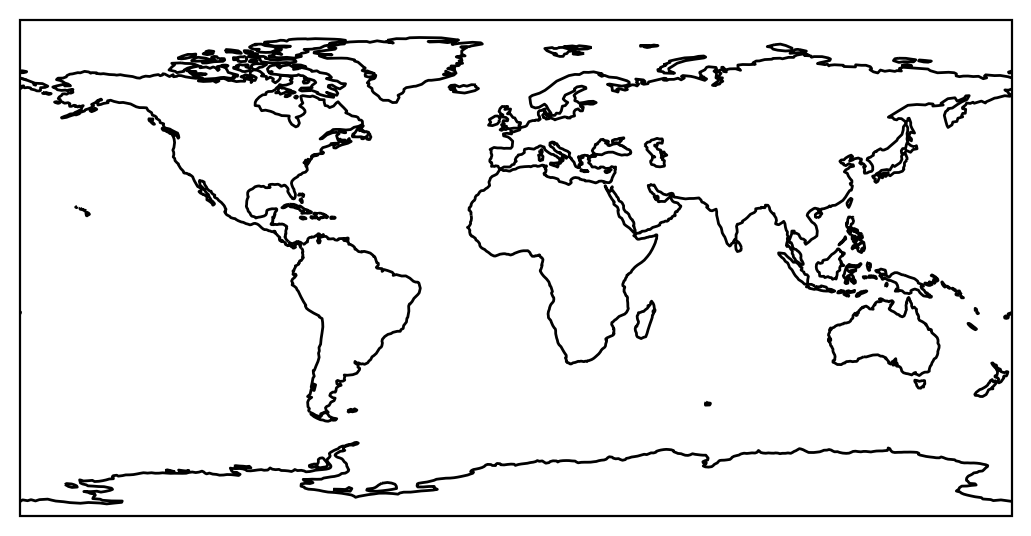

In [4]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

Cartopy also provides a new module `ax.coastlines` that plots coastlines.  [You can also specify the resolution to plot if you wish](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html#cartopy.mpl.geoaxes.GeoAxes.coastlines).

If you check the variables in your workspace, you'll see that `ax` is a [GeoAxis](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html) and contains the information to take e.g. longitude and latitude data and plot it on the map with the correct projection.  Importantly, Cartopy also adds a `transform` keyword argument to most of the Matplotlib plotting routines, so you can (and should) explicitly tell Matplotlib which coordinate reference system to use.

We can also pass addition inputs to the projection - in this case, we can ask it to move the central latitude for plotting to the Pacific, which can be useful if our feature of interest is in the Pacific!  Each projection may have different options you can pass.

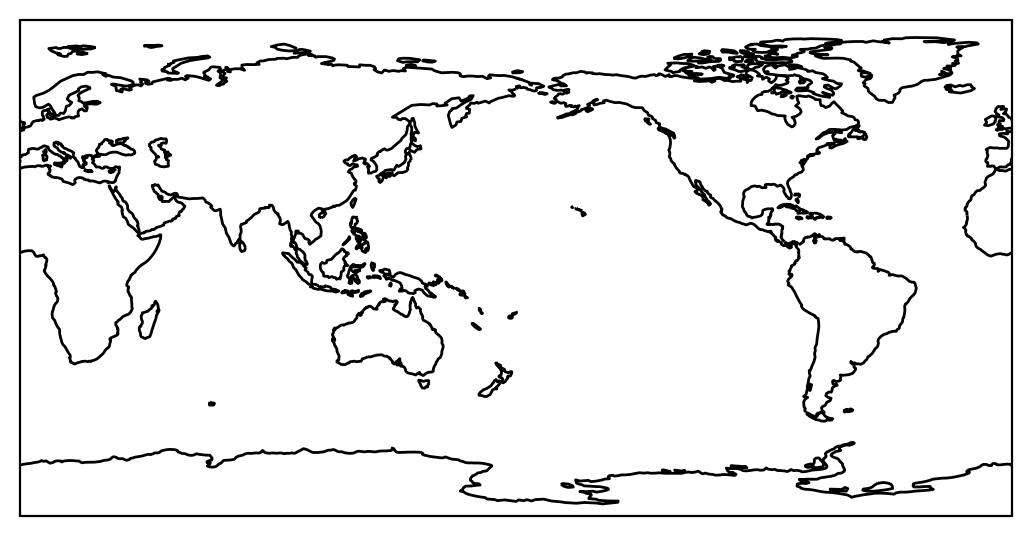

In [5]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

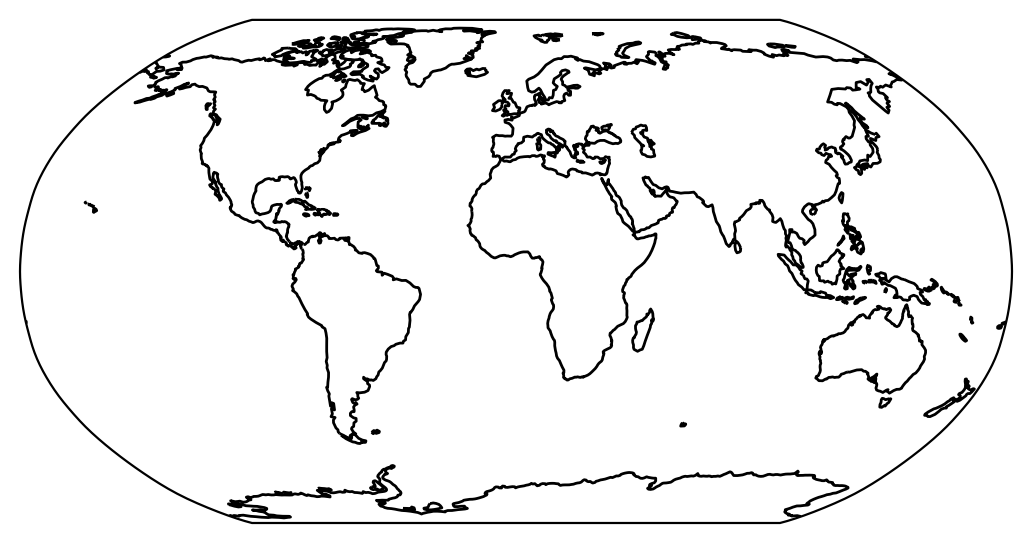

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()

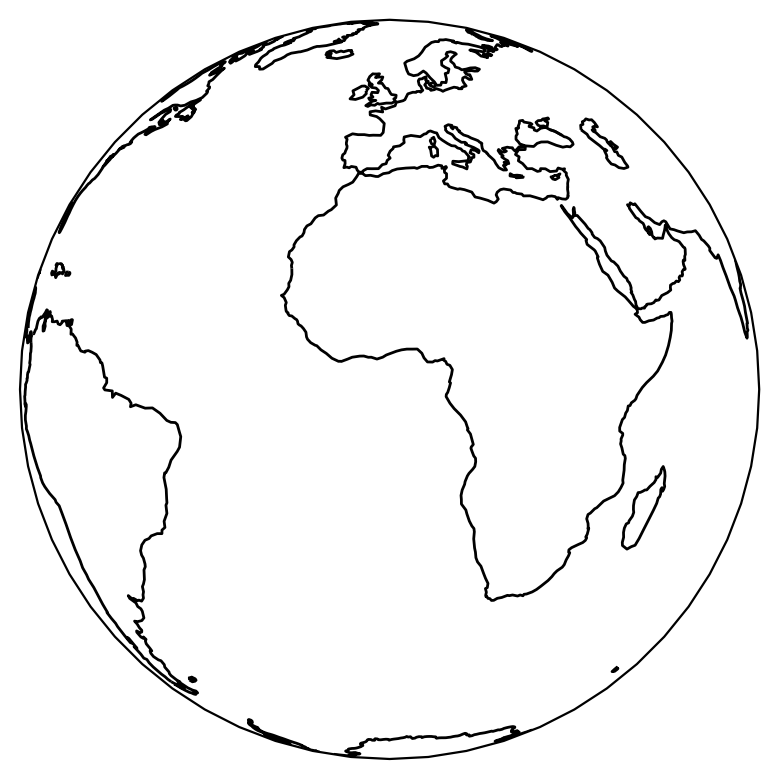

In [7]:
plt.figure()
ax = plt.axes(projection=ccrs.Orthographic())
ax.coastlines()

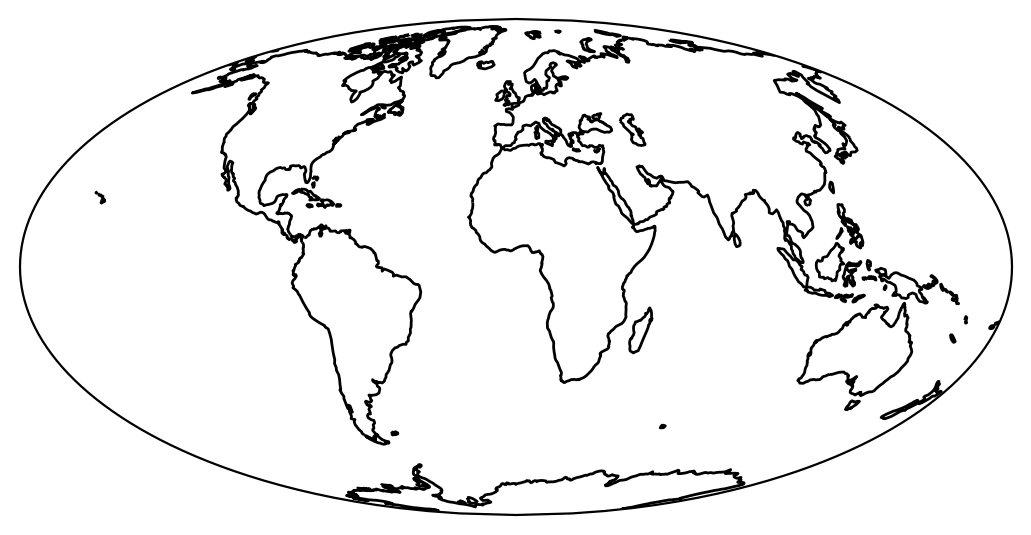

In [8]:
plt.figure()
ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()

Again, you can see a list of all the available projections here: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

You'll often have a situation where you only want to draw a portion of the globe.  You can specify in most projections the extent and position using `.set_extent` on the axes object and you can modify aspects of the projection by passing commands to the `ccrs.`  In the code block below, we assign the projection information from `ccrs` to a variable (originally enough called 'projection') and then use `projection=projection` in the `plt.axes`.  This means 'projection' is available to us to call later as well.  We then use `ax.set_extent` to modify the bounding box shown in the map.  The order of the specification is (longitude1, longitude2, latitude1, latitude2).

There are a few other commands below as well that show ways we can modify the map or add features:

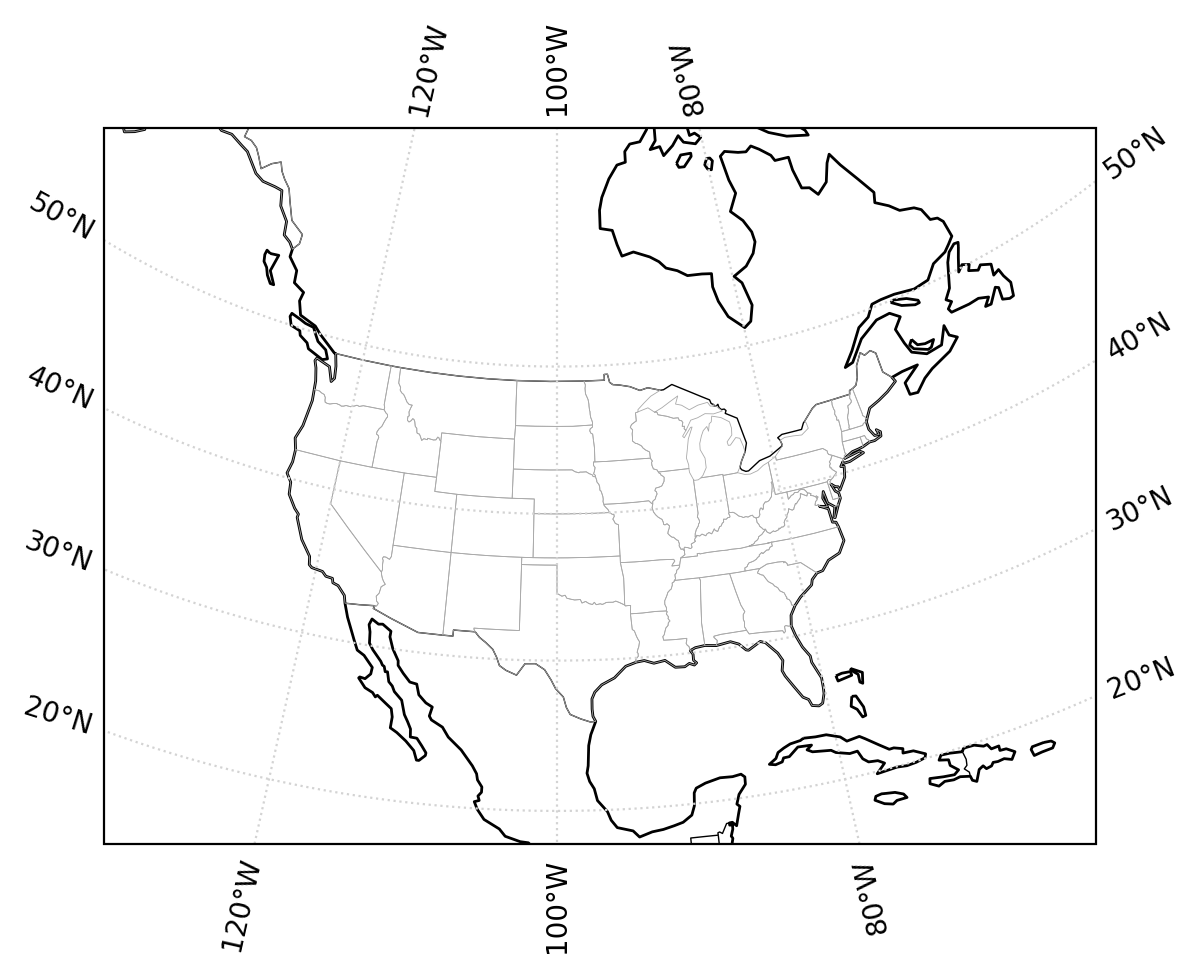

In [9]:
plt.figure()

# we can assign the projection and its characteristics to a variable called projection 
projection=ccrs.LambertConformal(central_longitude=260)

# now we call the axes and specify the project as the projection variable from above
ax = plt.axes(projection=projection)

# Here is where we set the longitude and latitude extent
ax.set_extent([-130, -64, 15, 62]) # (longitude1, longitude2, latitude1, latitude2)

# plot the coastlines as before
ax.coastlines(color="black") # we can pass arguments to .coastlines function

# let's add some gridlines
ax.gridlines(color='lightgrey', linestyle=':', draw_labels=True, x_inline=False,
             y_inline=False,  ylocs=[20, 30, 40, 50], xlocs=[-120, -100, -80])

ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='darkgray')


Here's another example, now focusing on the Mediterranean and plotting some rivers and lakes.  As above, we can add features like borders (international and states, where appropriate), rivers, lakes, etc.  A list of [features is here](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html).  You can once again make use of the [named colors in Matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html). 

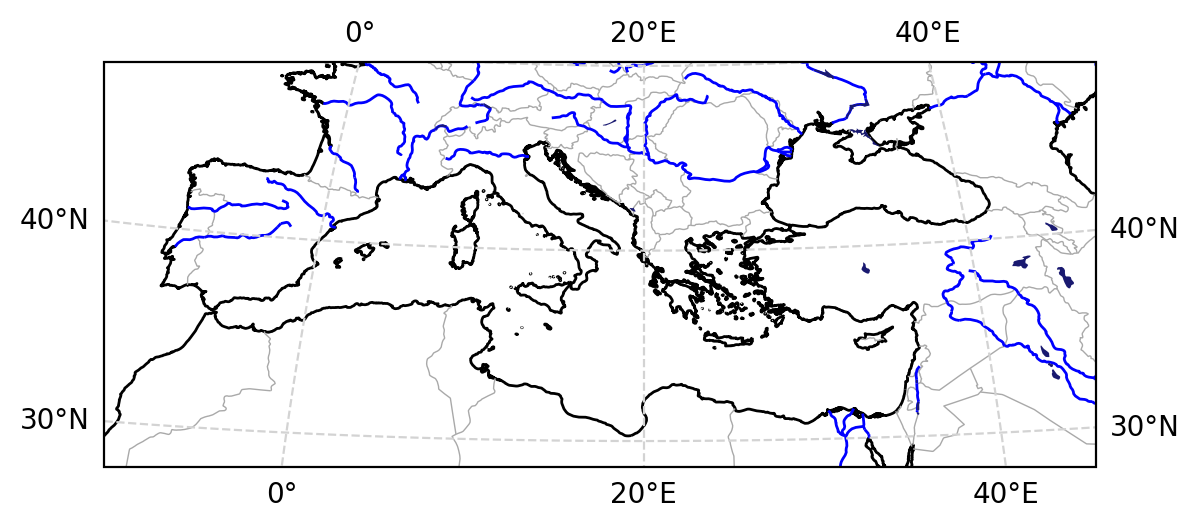

In [10]:
plt.figure()

# we can assign the projection and its characteristics to a variable called projection
projection = ccrs.LambertAzimuthalEqualArea(central_longitude=20)

# now we call the axes and specify the project as the projection variable from above
ax = plt.axes(projection=projection)

# Here is where we set the longitude and latitude extent
# (longitude1, longitude2, latitude1, latitude2)
ax.set_extent([-10, 45, 28, 47])

# plot the coastlines as before
# we can pass arguments to .coastlines function
ax.coastlines(resolution='10m') # Valid scales are "110m", "50m", and "10m".

# let's add some gridlines
ax.gridlines(color='lightgrey', linestyle='--', draw_labels=True, x_inline=False,
             y_inline=False,  ylocs=[20, 30, 40, 50], xlocs=[0, 20, 40])

ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='darkgray')
ax.add_feature(cfeature.RIVERS, linewidth=1, edgecolor='blue')
ax.add_feature(cfeature.LAKES, linewidth=0.5, edgecolor='none', facecolor='midnightblue')


Another example, this time using `ax.stock_img()` to give us a simple photo-like image for the land and ocean in our domain:

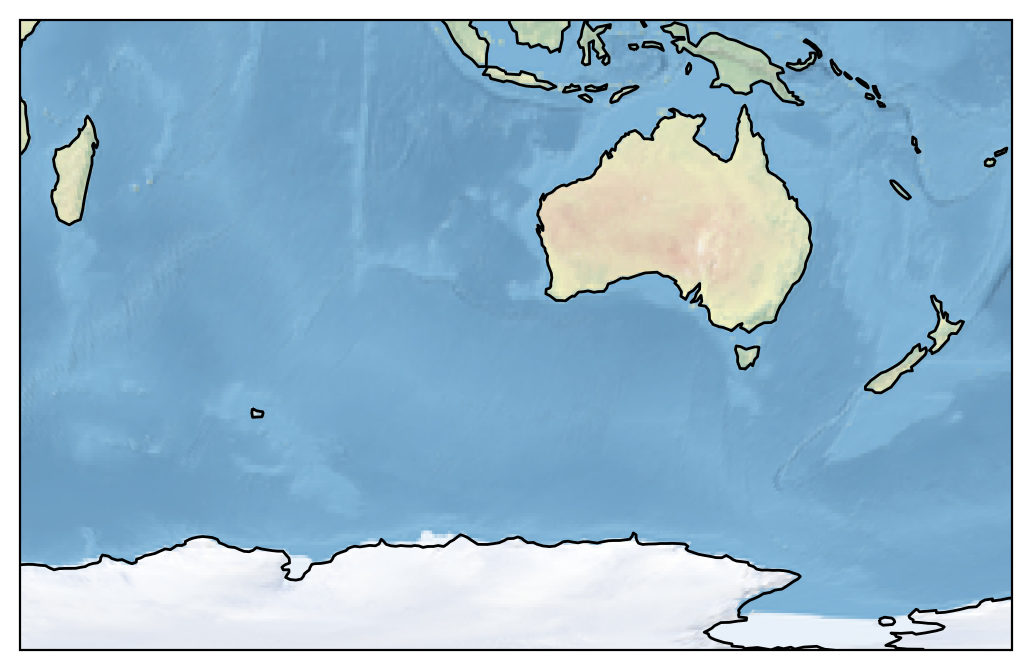

In [11]:
plt.figure()

# we can assign the projection and its characteristics to a variable called projection
projection = ccrs.Robinson(central_longitude=100)

# now we call the axes and specify the project as the projection variable from above
ax = plt.axes(projection=projection)

# Here is where we set the longitude and latitude extent
# (longitude1, longitude2, latitude1, latitude2)
ax.set_extent([40, 180, 0, -75])

# pretty land and ocean image
ax.stock_img()

# coastlines as before
ax.coastlines(resolution='110m')  # Valid scales are "110m", "50m", and "10m".

Let's now see how we plot data in a map with a certain projection.  Let's do a simple location plot of Tucson and Flagstaff.  We'll use a `dict` structure to hold these data, but really we can pass any longitude and latitude coordinates to Matplotlib functions like `.plot` or `.scatter`.  The key is to include the `transform=` keyword argument in these.  Sometimes Cartopy figures out automatically what you're trying to do, but in my experience it most often doesn't, so always best to tell it, essentially, 'hey, these are latitude and longitude points on a regular grid' or 'these Geodetic coordinates'.  I confess I'm still not 100% clear on why they designed it this way.  Essentially, the projection determines the map projection, but the `transform` tells Cartopy that you are regular latitude longitude space.  So, the `transform` option that works most of the time is `transform=ccrs.PlateCarree()` (which is apparently just a simple way of saying 'these are regular latitude and longitude points').  Another option is `transform=ccrs.Geodetic()` which works sometimes but not always, but would be needed if you were plotting great circle routes, for instance.   

Text(-111.4513, 35.1983, 'FLAGSTAFF')

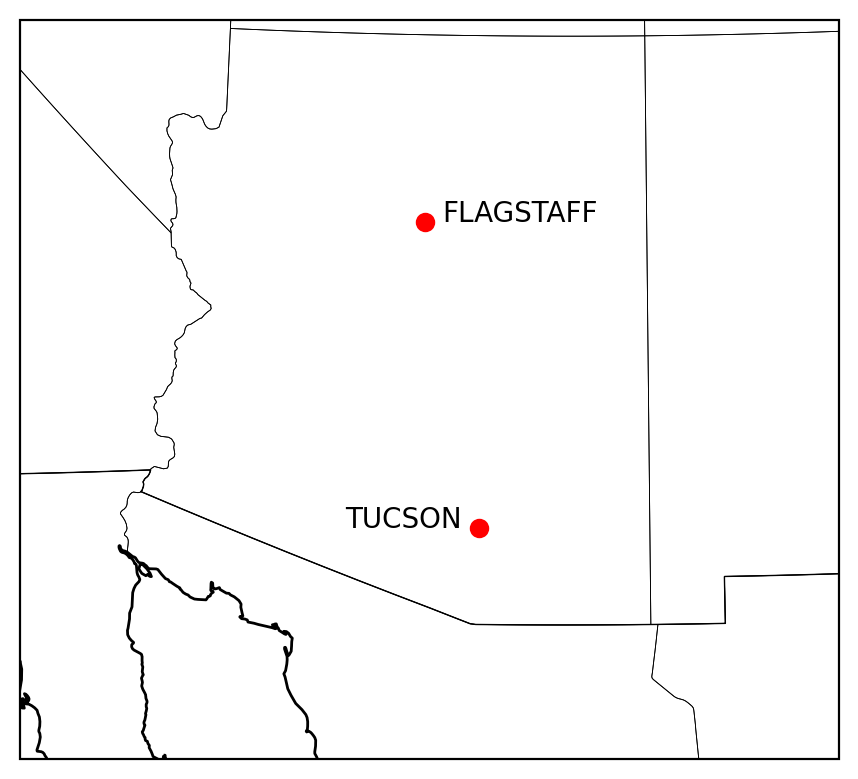

In [12]:
tucson = dict(lon=-110.9742, lat=32.2540) 
flagstaff = dict(lon=-111.6513, lat=35.1983) 

# initialize the figure
plt.figure()

# set projection for axes
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-110))

# Here is where we set the longitude and latitude extent
# (longitude1, longitude2, latitude1, latitude2)
ax.set_extent([-116, -107, 30, 37])

# plot the coastlines as before
ax.coastlines(color="black")  # we can pass arguments to .coastlines function

# states and international borders
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='black')

# In order to plot data, we need to provide the 'transform' below
ax.plot(tucson['lon'], tucson['lat'], 'ro', transform=ccrs.Geodetic())
ax.plot(flagstaff['lon'], flagstaff['lat'], 'ro', transform=ccrs.Geodetic())

ax.text(tucson['lon']-0.2, tucson['lat'], 'TUCSON', horizontalalignment='right', transform=ccrs.Geodetic())
ax.text(flagstaff['lon']+0.2, flagstaff['lat'], 'FLAGSTAFF', horizontalalignment='left', transform=ccrs.Geodetic())

Let's look at a slightly different example.  In addition to using `transform=ccrs.Geodetic()` to plot points as we did above, we can pass `transform=ccrs.PlateCarree()` instead. Again, this is confusing to me - my way of understanding the system is that projections are for the maps, but `transform=ccrs.PlateCarree()` is for latitude and longitude data on a regular grid. 

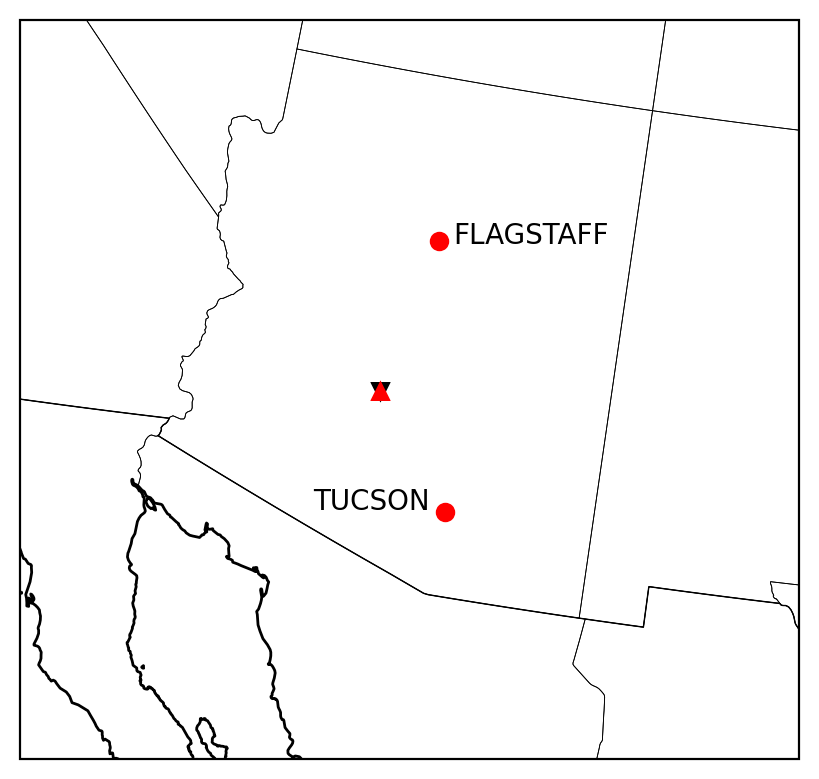

In [13]:
# initialize the figure
plt.figure()

# set projection for axes
ax = plt.axes(projection=ccrs.LambertConformal())

# Here is where we set the longitude and latitude extent
# (longitude1, longitude2, latitude1, latitude2)
ax.set_extent([-116, -107, 30, 37])

# plot the coastlines as before
ax.coastlines(color="black")  # we can pass arguments to .coastlines function

# states and international borders
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='black')

# In order to plot data, we need to provide the 'transform' below
ax.plot(tucson['lon'], tucson['lat'], 'ro', transform=ccrs.PlateCarree())
ax.plot(flagstaff['lon'], flagstaff['lat'], 'ro', transform=ccrs.PlateCarree())

ax.text(tucson['lon']-0.2, tucson['lat'], 'TUCSON',
         horizontalalignment='right', transform=ccrs.PlateCarree())
ax.text(flagstaff['lon']+0.2, flagstaff['lat'], 'FLAGSTAFF',
         horizontalalignment='left', transform=ccrs.PlateCarree())

# note that if we don't specify the transform, it doesn't work
ax.plot(-112.0740, 33.4484,'ko') # no Phoenix without transform
ax.plot(-112.0740, 33.4484, 'k^', transform=ccrs.LambertConformal())  # no Phoenix using projection
ax.plot(-112.0740, 33.4484, 'kv', transform=ccrs.PlateCarree())  # Phoenix plotted
ax.plot(-112.0740, 33.4484, 'r^', transform=ccrs.Geodetic())  # Phoenix plotted


[Cartopy says](https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html) 'The safest thing to do is always provide the transform keyword regardless of the projection you are using, and avoid letting Cartopy make assumptions about your data’s coordinate system.' OK, we'll continue to do that.  The surest thing is probably to use `transform=ccrs.PlateCarree()` when plotting data, assuming it looks reasonable in your chosen projection.  

Now, let's see how we might plot a 2 dimensional continuous field.  First, we'll create some simulated data, then plot it on a projection using a contour plot:

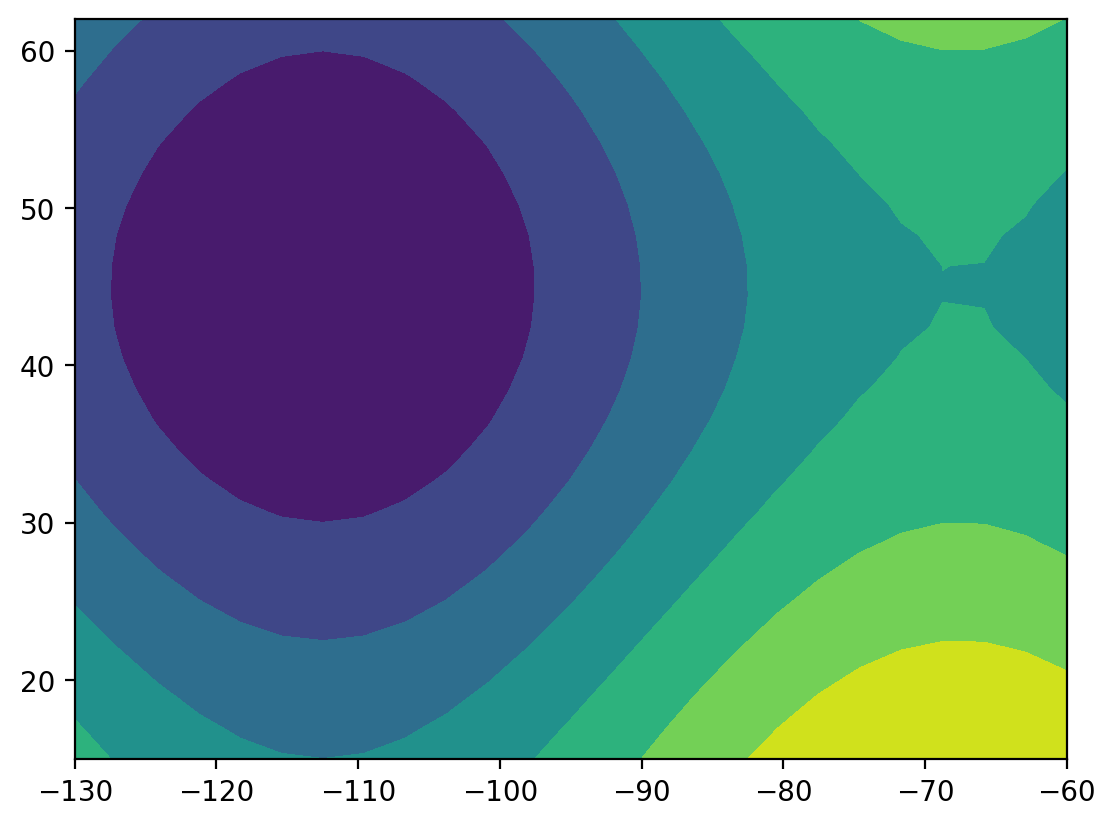

In [14]:
lon = np.linspace(-130, -60, 25) # longitude points
lat = np.linspace(15, 62, 25) #latitude points
lon2d, lat2d = np.meshgrid(lon, lat) # mesh them together to create a grid
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4) # apply a fun transform over that grid

plt.contourf(lon2d, lat2d, data)


As we can see, we've got a nicely varying 2-dimensional field with x and y coordinates that look to be in the range the geographic coordinates over North America. Let's now see how we could plot this on a map as a filled contour (`ax.contourf`):

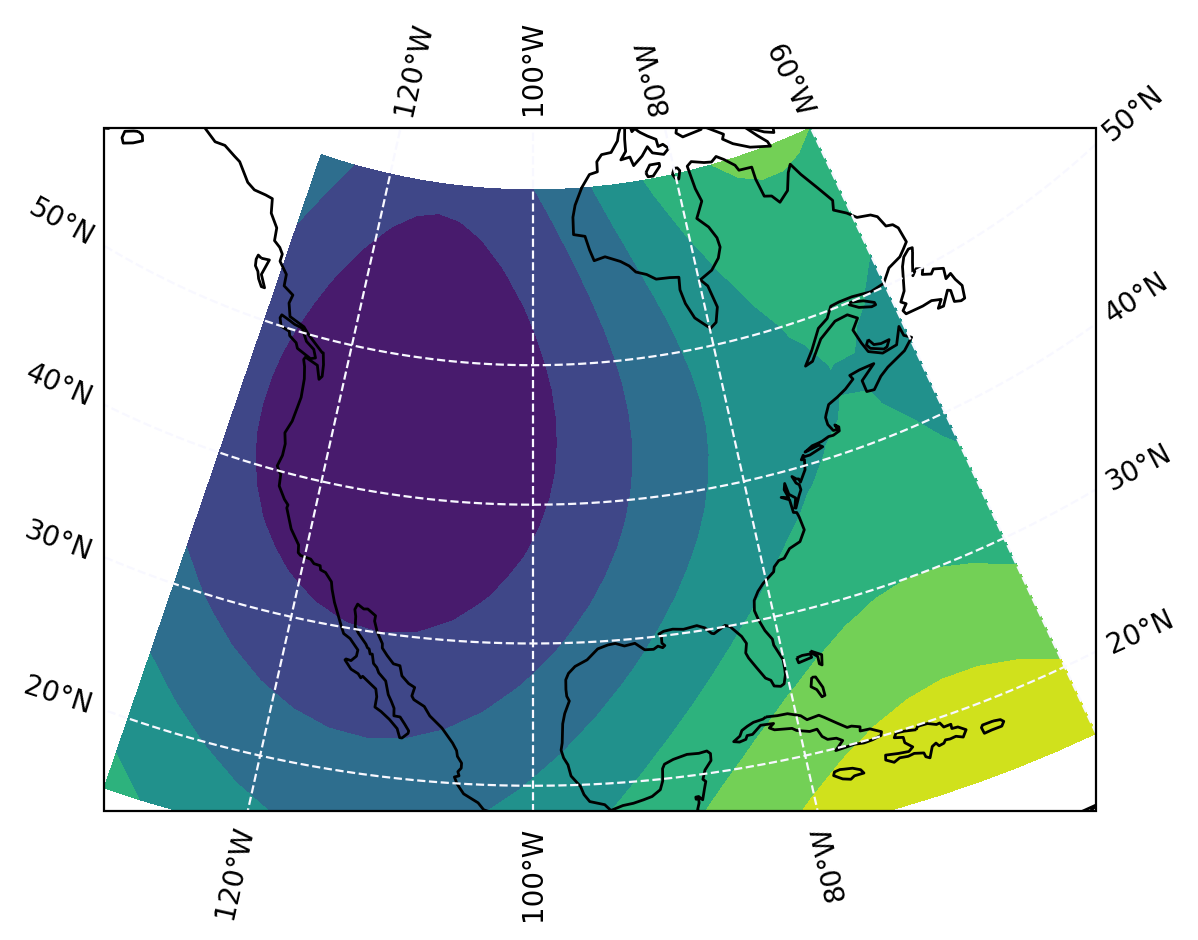

In [15]:
plt.figure()

# we can assign the projection and its characteristics to a variable called projection
projection = ccrs.LambertConformal(central_longitude=260)

# now we call the axes and specify the project as the projection variable from above
ax = plt.axes(projection=projection)

# plot the coastlines as before
ax.coastlines(color="black")  # we can pass arguments to .coastlines function

# plot contour and specify ccrs.PlateCarree()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

# Here is where we set the longitude and latitude extent
# (longitude1, longitude2, latitude1, latitude2)
ax.set_extent([-130, -60, 15, 62])

ax.gridlines(color='ghostwhite', linestyle='--', draw_labels=True, x_inline=False,
             y_inline=False,  ylocs=[20, 30, 40, 50], xlocs=[-120, -100, -80, -60])


Note above in `ax.contourf` that I use the `transform=ccrs.PlateCarree` (if I used `transform=ccrs.Geodetic()` here I would get an error because the contouring routine apparently has difficulty contouring over the spherical shape implied by the Lambert Conformal projection I'm using).  Using `transform=ccrs.PlateCarree` essentially tells Cartopy and Matplotlib 'these are longitude and latitude coordinates'.  So again, when in doubt, pass `transform=ccrs.PlateCarree` to your plotting modules, and things will probably work. 

It is also possible to plot 2-dimensional data in other ways.  For instance `pcolormesh` gives you a pseudocolor plot that shows the facets or grid structure in your data:

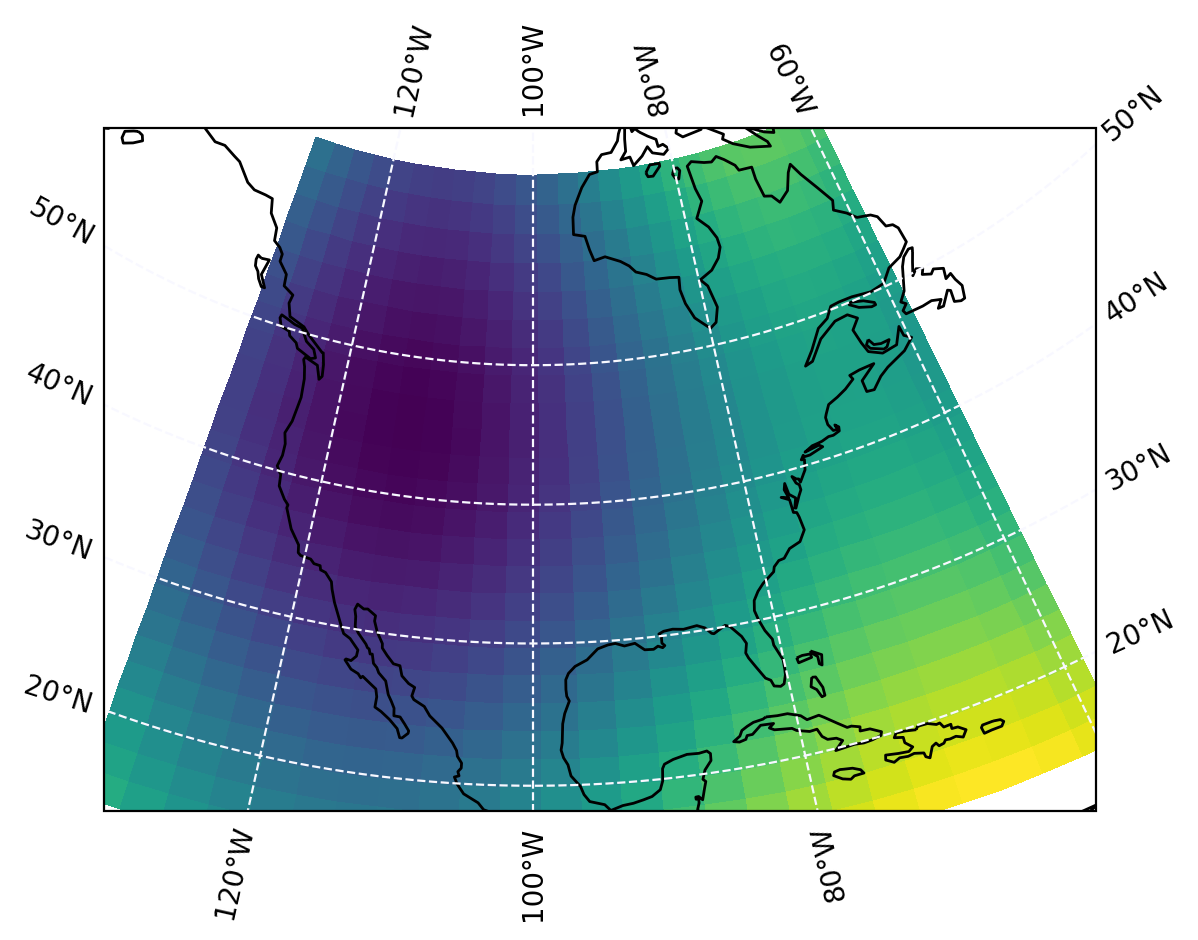

In [16]:
plt.figure()

# we can assign the projection and its characteristics to a variable called projection
projection = ccrs.LambertConformal(central_longitude=260)

# now we call the axes and specify the project as the projection variable from above
ax = plt.axes(projection=projection)

# plot the coastlines as before
ax.coastlines(color="black")  # we can pass arguments to .coastlines function

# plot contour and specify ccrs.PlateCarree()
ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree())

# Here is where we set the longitude and latitude extent
# (longitude1, longitude2, latitude1, latitude2)
ax.set_extent([-130, -60, 15, 62])

ax.gridlines(color='ghostwhite', linestyle='--', draw_labels=True, x_inline=False,
             y_inline=False,  ylocs=[20, 30, 40, 50], xlocs=[-120, -100, -80, -60])


you could also do something fun, like use the mesh grid coordinate to make a 2-dimensional scatter plot - see how I've used `ax.scatter` below (and see here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

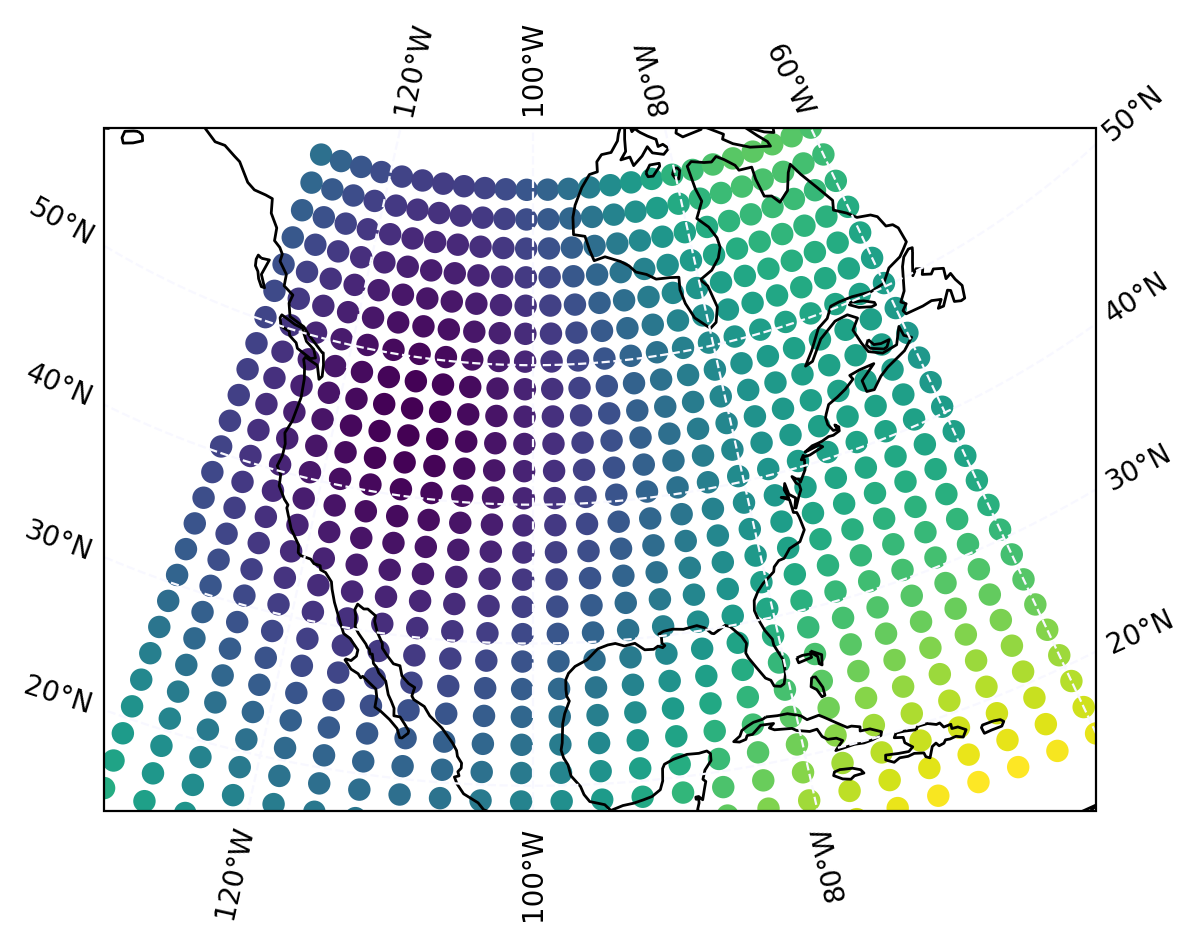

In [17]:
plt.figure()

# we can assign the projection and its characteristics to a variable called projection
projection = ccrs.LambertConformal(central_longitude=260)

# now we call the axes and specify the project as the projection variable from above
ax = plt.axes(projection=projection)

# plot the coastlines as before
ax.coastlines(color="black")  # we can pass arguments to .coastlines function

# plot contour and specify ccrs.PlateCarree()
ax.scatter(lon2d, lat2d, 50, data,  transform=ccrs.PlateCarree())

# Here is where we set the longitude and latitude extent
# (longitude1, longitude2, latitude1, latitude2)
ax.set_extent([-130, -60, 15, 62])

ax.gridlines(color='ghostwhite', linestyle='--', draw_labels=True, x_inline=False,
             y_inline=False,  ylocs=[20, 30, 40, 50], xlocs=[-120, -100, -80, -60])


What about a different colormap for our 2-dimensional data? There is a lot about the selection and use of colormaps in Matplotlib here: https://matplotlib.org/stable/tutorials/colors/colormaps.html

You can change the colormap using `cmap=` in the call to your contour or other plotting command.  

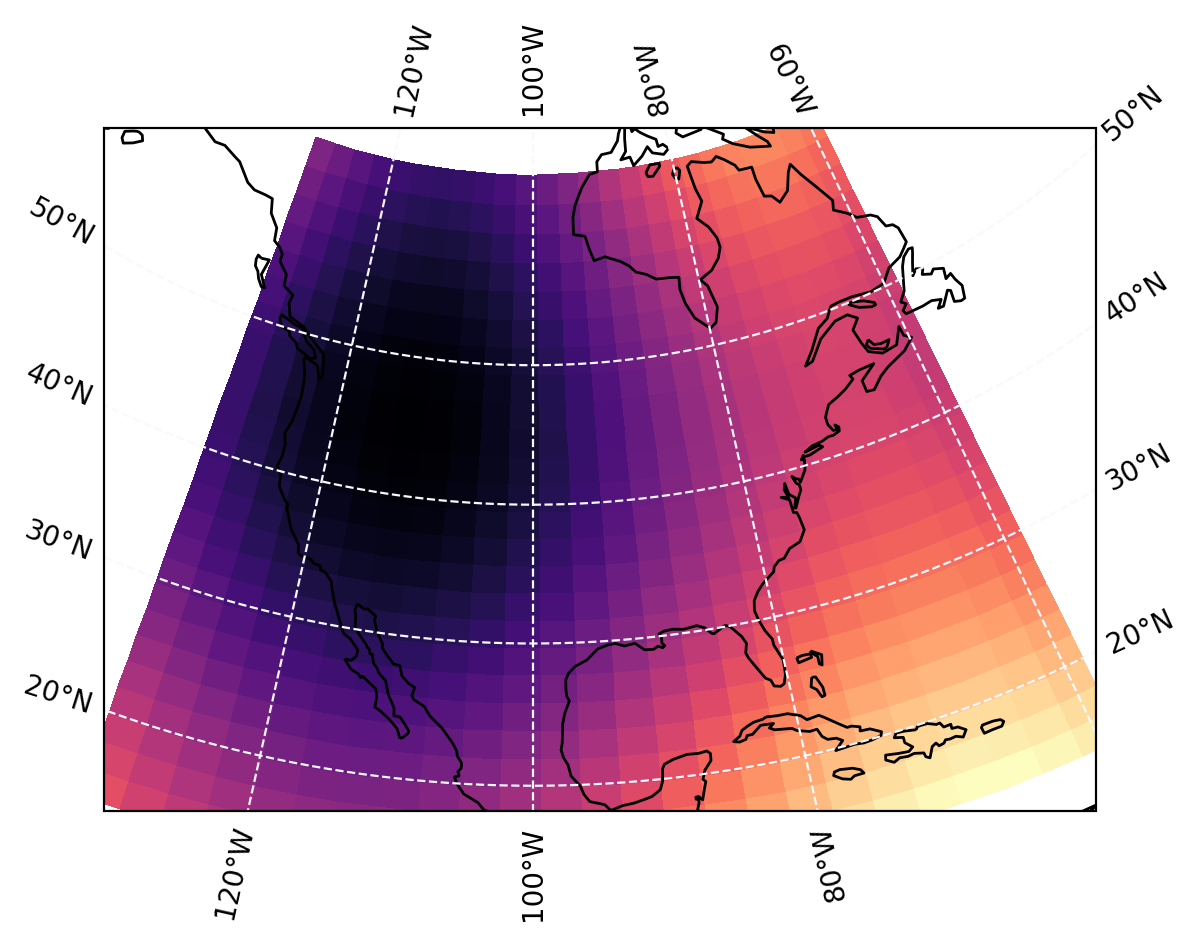

In [18]:
plt.figure()

# we can assign the projection and its characteristics to a variable called projection
projection = ccrs.LambertConformal(central_longitude=260)

# now we call the axes and specify the project as the projection variable from above
ax = plt.axes(projection=projection)

# plot the coastlines as before
ax.coastlines(color="black")  # we can pass arguments to .coastlines function

# plot contour and specify ccrs.PlateCarree()
ax.pcolormesh(lon, lat, data, cmap='magma', transform=ccrs.PlateCarree())

# Here is where we set the longitude and latitude extent
# (longitude1, longitude2, latitude1, latitude2)
ax.set_extent([-130, -60, 15, 62])

ax.gridlines(color='ghostwhite', linestyle='--', draw_labels=True, x_inline=False,
             y_inline=False,  ylocs=[20, 30, 40, 50], xlocs=[-120, -100, -80, -60])


We can also add a colorbar so anyone viewing the map can equate color with value.  More about customizing colorbars in Matplotlib is here: https://matplotlib.org/stable/tutorials/colors/colorbar_only.html


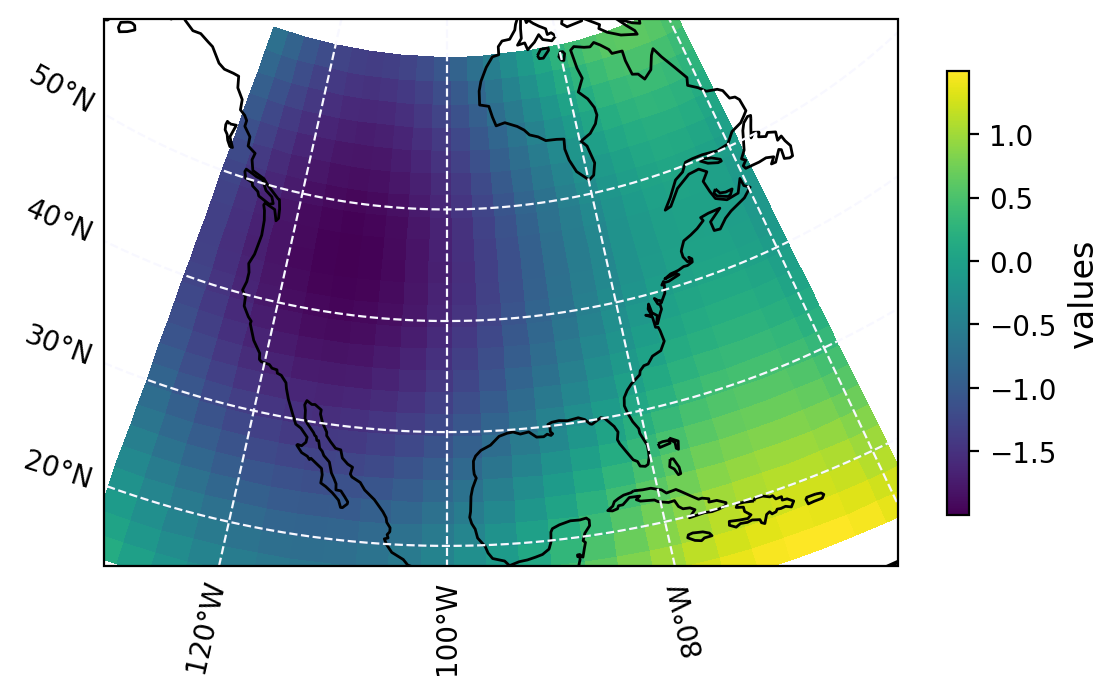

In [19]:
plt.figure()

# we can assign the projection and its characteristics to a variable called projection
projection = ccrs.LambertConformal(central_longitude=260)

# now we call the axes and specify the project as the projection variable from above
ax = plt.axes(projection=projection)

# plot the coastlines as before
ax.coastlines(color="black")  # we can pass arguments to .coastlines function

# plot contour and specify ccrs.PlateCarree()
px = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree())

# Here is where we set the longitude and latitude extent
# (longitude1, longitude2, latitude1, latitude2)
ax.set_extent([-130, -60, 15, 62])

gl = ax.gridlines(color='ghostwhite', linestyle='--', draw_labels=["left", "bottom"], x_inline=False,
                  y_inline=False, ylocs=[20, 30, 40, 50], xlocs=[-120, -100, -80, -60])
 
cb = plt.colorbar(px, orientation='vertical',shrink=0.6, ax=ax)
cb.set_label('values', fontsize=12)


While Matplotlib borrowed many of MATLAB's plotting conventions and in many cases improved them, the treatment of the colorbar is not one of them.  Using the 'handle' to the `pcolormesh` above and passing it to the colorbar connects the values in the plotted data to the colorbar